In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_feather('dataset_current_base.feather')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1442 non-null   datetime64[ns]
 1   app_power       1442 non-null   float64       
 2   temp            1442 non-null   float64       
 3   Sub_metering_1  1442 non-null   float64       
 4   Sub_metering_2  1442 non-null   float64       
 5   Sub_metering_3  1442 non-null   float64       
 6   price           1442 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.0 KB


In [5]:
df.head()

,Date,app_power,temp,Sub_metering_1,Sub_metering_2,Sub_metering_3,price
0,2006-12-16,1210.250117,42.98,0.0,546.0,4926.0,0.1169
1,2006-12-17,3406.467166,40.10,2033.0,4187.0,13341.0,0.1169
2,2006-12-18,2222.018835,39.92,1063.0,2621.0,14018.0,0.1169
3,2006-12-19,1685.781483,36.68,839.0,7602.0,6197.0,0.1169
4,2006-12-20,2241.770383,37.40,0.0,2648.0,14063.0,0.1169


In [6]:
df.tail()

,Date,app_power,temp,Sub_metering_1,Sub_metering_2,Sub_metering_3,price
1437,2010-11-22,2055.077640,40.82,4855.0,2110.0,10136.0,0.1283
1438,2010-11-23,1593.457076,41.54,1871.0,458.0,7611.0,0.1283
1439,2010-11-24,1809.263446,42.26,1096.0,2848.0,12224.0,0.1283
1440,2010-11-25,1443.176559,38.12,1076.0,426.0,5072.0,0.1283
1441,2010-11-26,1499.615294,33.98,1080.0,385.0,9989.0,0.1283


In [7]:
# Check for missing values
df.isnull().sum()

Date              0
app_power         0
temp              0
Sub_metering_1    0
Sub_metering_2    0
Sub_metering_3    0
price             0
dtype: int64

In [8]:
# Check basic statistics
df.describe()

,Date,app_power,temp,Sub_metering_1,Sub_metering_2,Sub_metering_3,price
count,1442,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,2008-12-05 12:00:00,1576.828214,54.345340,1596.721914,1855.327046,9271.608183,0.121115
min,2006-12-16 00:00:00,0.000000,23.000000,0.000000,0.000000,0.000000,0.116900
25%,2007-12-11 06:00:00,1193.456188,46.040000,579.750000,430.250000,6658.750000,0.120300
50%,2008-12-05 12:00:00,1561.619033,54.680000,1110.500000,687.000000,9287.500000,0.120700
75%,2009-11-30 18:00:00,1906.392321,63.815000,2200.000000,2727.250000,11771.750000,0.122200
max,2010-11-26 00:00:00,4783.524552,81.500000,11224.000000,12109.000000,23743.000000,0.128300
std,NaN,610.276152,11.574641,1587.455483,2086.496681,3774.591770,0.003115


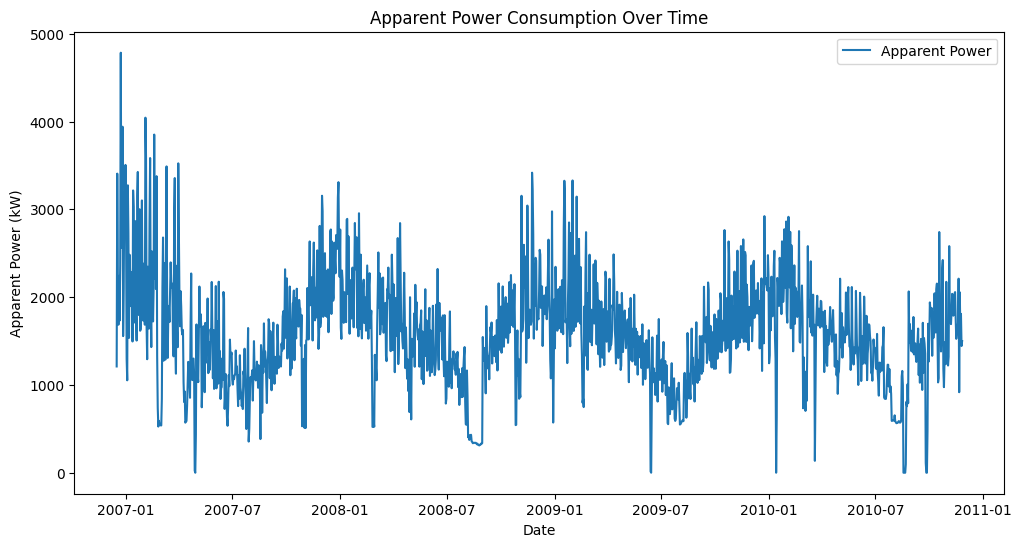

In [10]:
# Plot power consumption over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['app_power'], label='Apparent Power')
plt.title('Apparent Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Apparent Power (kW)')
plt.legend()
plt.show()

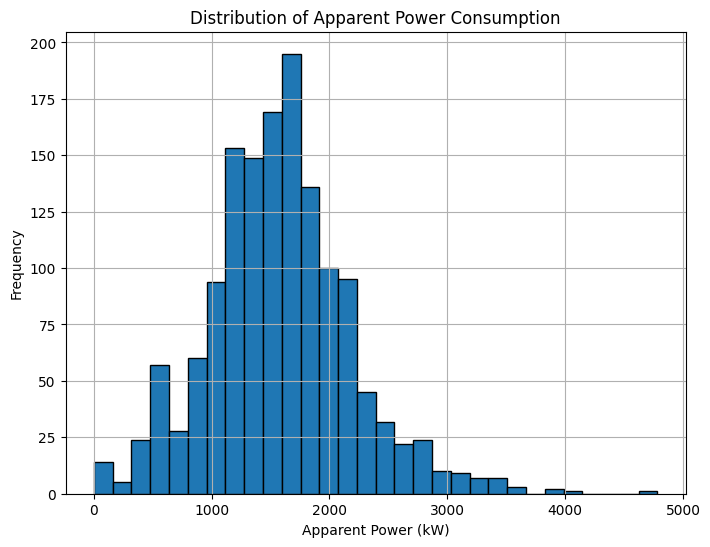

In [11]:
# Histogram of apparent power
df['app_power'].hist(bins=30, edgecolor='k', figsize=(8, 6))
plt.title('Distribution of Apparent Power Consumption')
plt.xlabel('Apparent Power (kW)')
plt.ylabel('Frequency')
plt.show()

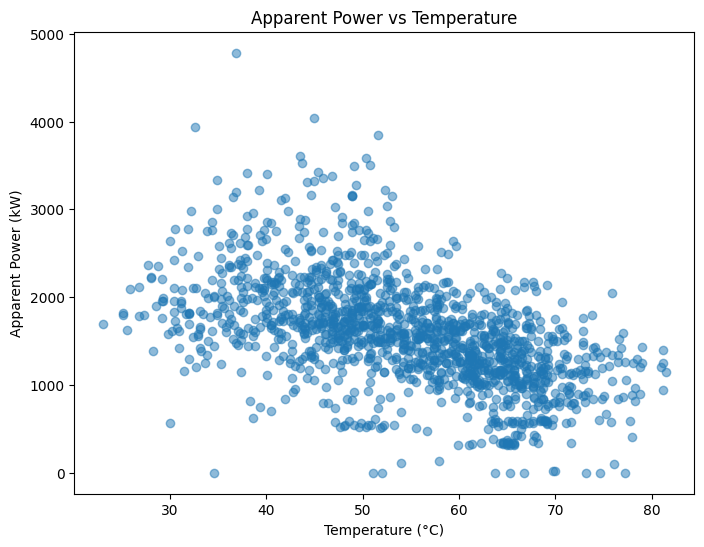

In [12]:
# Scatter plot of apparent power vs temperature
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['app_power'], alpha=0.5)
plt.title('Apparent Power vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Apparent Power (kW)')
plt.show()


##### We see there seems to be a negative correlation between temperature and power consumption.


                    Date  app_power      temp  Sub_metering_1  Sub_metering_2  \
Date            1.000000  -0.125487  0.070185       -0.087442       -0.152903   
app_power      -0.125487   1.000000 -0.533909        0.551188        0.478541   
temp            0.070185  -0.533909  1.000000       -0.135226       -0.119824   
Sub_metering_1 -0.087442   0.551188 -0.135226        1.000000        0.254537   
Sub_metering_2 -0.152903   0.478541 -0.119824        0.254537        1.000000   
Sub_metering_3  0.173786   0.701135 -0.389912        0.306316        0.193276   
price           0.727589  -0.149409  0.177401       -0.076865       -0.112873   

                Sub_metering_3     price  
Date                  0.173786  0.727589  
app_power             0.701135 -0.149409  
temp                 -0.389912  0.177401  
Sub_metering_1        0.306316 -0.076865  
Sub_metering_2        0.193276 -0.112873  
Sub_metering_3        1.000000  0.004611  
price                 0.004611  1.000000  


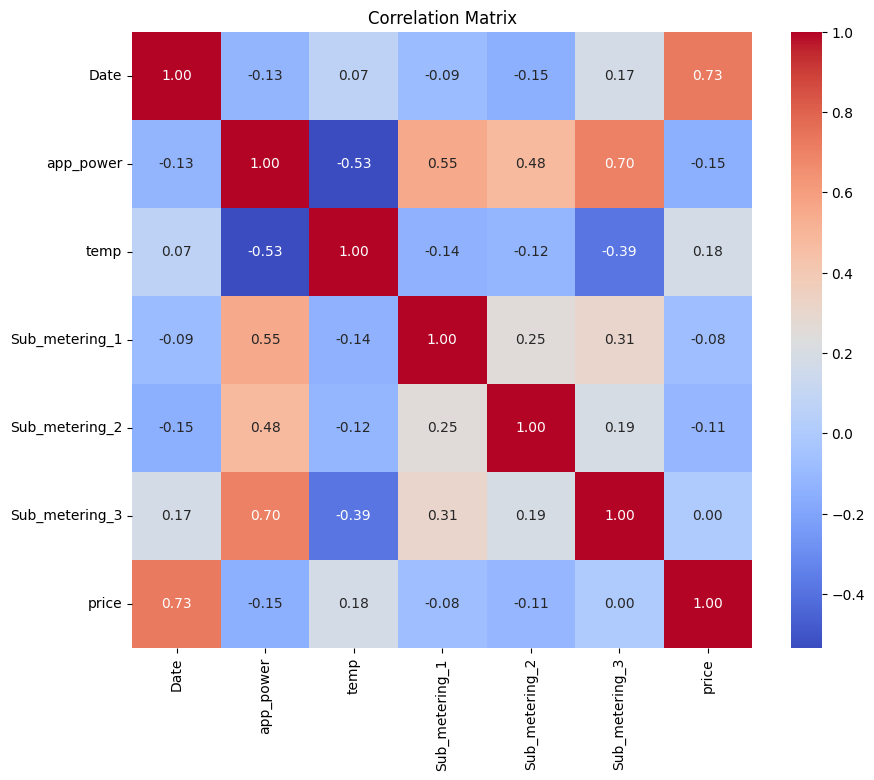

In [13]:
# Compute correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap of correlations
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


##### What we see from the Correlation Matrix is that app_power is most correlated to Sub_metering_3. This makes sense because Sub_metering_3 corresponds to the energy drawn by an electric water-heater and an air-conditioner, most likely the the largest energy guzzling sub-unit of the house (I believe heating was performed via a gas unit). 



##### The other two Sub_metering features are somewhat correlated. Also, the 'temp' feature has a pretty good negative correlation with 'app_power' as it should since when 'temp' goes down, the energy consumption of the water heater will go up, but that is countered by the lack of need for the air-conditioner; and vice versa for when the 'temp' goes up.



##### Among the features themselves, we see a strong correlation only between 'Date' and 'price.' We would probably benefit from eliminating one of them from the dataset, obviously that would be 'price,' or engineer them into one feature. Probably engineering them into one feature would be best.



#### Stacked Area Plot for Sub-Metering Contributions


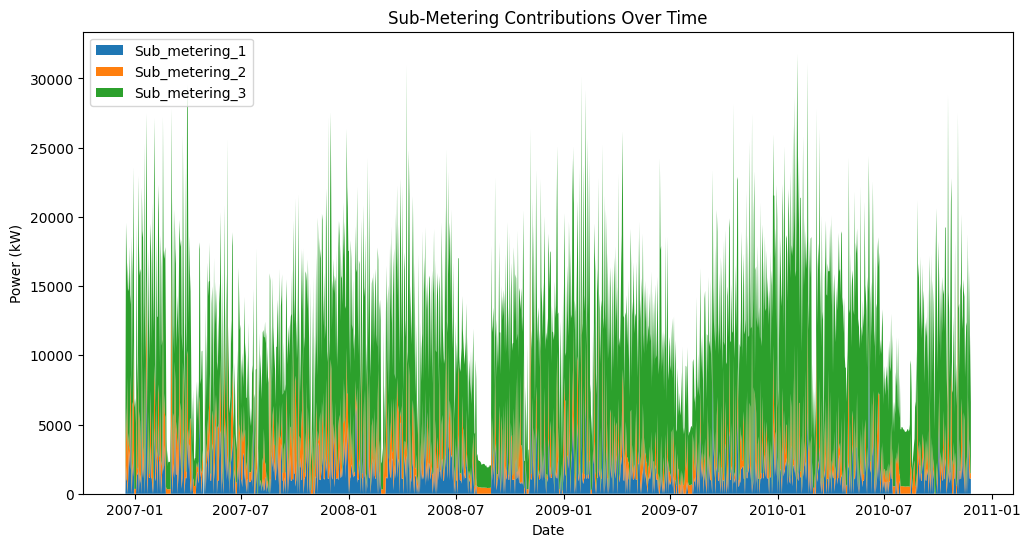

In [14]:
# Plot stacked sub-metering
plt.figure(figsize=(12, 6))
plt.stackplot(
    df['Date'],
    df['Sub_metering_1'],
    df['Sub_metering_2'],
    df['Sub_metering_3'],
    labels=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
)
plt.title('Sub-Metering Contributions Over Time')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend(loc='upper left')
plt.show()


##### As we have already surmised, Sub_metering_3 largely dominates the power consumption contribution.



##### Let's look at how electricty price influences power consumption.


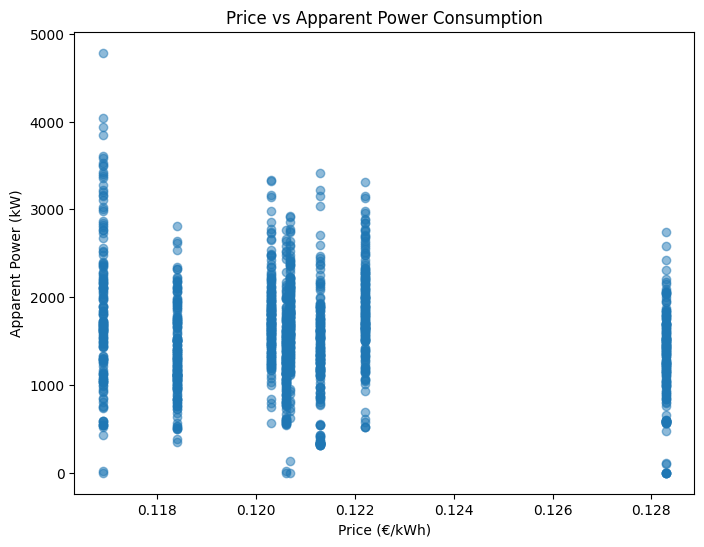

In [15]:
# Scatter plot of price vs power consumption
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['app_power'], alpha=0.5)
plt.title('Price vs Apparent Power Consumption')
plt.xlabel('Price (€/kWh)')
plt.ylabel('Apparent Power (kW)')
plt.show()


##### Does not convey anything definitive.



##### Let us now work with as close to the original dataset as we can, with little to no added columns, etc. to create a baseline model.


In [18]:
# Create a new DataFrame by dropping 'temp' and 'price' columns
df_base = df.drop(columns=['temp', 'price'])

# Verify the new DataFrame
df_base.head()

,Date,app_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1210.250117,0.0,546.0,4926.0
1,2006-12-17,3406.467166,2033.0,4187.0,13341.0
2,2006-12-18,2222.018835,1063.0,2621.0,14018.0
3,2006-12-19,1685.781483,839.0,7602.0,6197.0
4,2006-12-20,2241.770383,0.0,2648.0,14063.0


In [19]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1442 non-null   datetime64[ns]
 1   app_power       1442 non-null   float64       
 2   Sub_metering_1  1442 non-null   float64       
 3   Sub_metering_2  1442 non-null   float64       
 4   Sub_metering_3  1442 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 56.5 KB


In [23]:
# Define predictors (X) and target (y)
X = df_base[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df_base['app_power']

In [24]:
from sklearn.model_selection import train_test_split

# Define the split ratio (e.g., 80% for training, 20% for testing)
train_size = int(len(df_base) * 0.8)

# Sequentially split the data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R²: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R²: 0.5894318597778532
RMSE: 318.43821630132487
MAE: 231.34984291636172



##### R^2 = 0.894 means that approximately 59% of the variation in 'app_power' is explained by the Sub_metering_# features. We think for a baseline model, this is reasonable and suggests the features provide some predictive power.



##### RMSE = 318.44 is a bit high considering much of the 'app_power' values are in the range of 1000 and 2500. But for a baseline model, this is acceptable.



##### MAE = 231.35 is a decent baseline result which we hope to improve in future iterations.



#### Now we will feature engineer, add more datasets, and try more complex model types.


In [3]:
df = pd.read_feather('dataset_current_base.feather')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1442 non-null   datetime64[ns]
 1   app_power       1442 non-null   float64       
 2   temp            1442 non-null   float64       
 3   Sub_metering_1  1442 non-null   float64       
 4   Sub_metering_2  1442 non-null   float64       
 5   Sub_metering_3  1442 non-null   float64       
 6   price           1442 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.0 KB


In [5]:
# Extract features from 'Date'
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.weekday
df['day_of_year'] = df['Date'].dt.dayofyear
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


##### Calculate daily changes in price to capture variations that are not solely time-related


In [6]:
df['price_diff'] = df['price'].diff().fillna(0)


##### Price as a Function of Time


In [7]:
df['price_month_interaction'] = df['price'] * df['month']


##### Subtract the yearly average price to remove long-term trends


In [8]:
yearly_avg_price = df.groupby('year')['price'].transform('mean')
df['price_normalized'] = df['price'] - yearly_avg_price

In [9]:
# Create columns for previous day’s (lag_1), previous week’s (lag_7) power consumption.
df['app_power_lag_1'] = df['app_power'].shift(1)
df['app_power_lag_7'] = df['app_power'].shift(7)

In [10]:
# rolling averages or sums to smooth out short-term fluctuations
df['rolling_mean_7'] = df['app_power'].rolling(window=7).mean()
df['rolling_sum_7'] = df['app_power'].rolling(window=7).sum()

In [11]:
# differences in power consumption
df['app_power_diff_1'] = df['app_power'].diff(1)

In [12]:
# Create interaction features
df['temp_price_interaction'] = df['temp'] * df['price']
df['sub_metering_interaction'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1442 non-null   datetime64[ns]
 1   app_power                 1442 non-null   float64       
 2   temp                      1442 non-null   float64       
 3   Sub_metering_1            1442 non-null   float64       
 4   Sub_metering_2            1442 non-null   float64       
 5   Sub_metering_3            1442 non-null   float64       
 6   price                     1442 non-null   float64       
 7   year                      1442 non-null   int32         
 8   month                     1442 non-null   int32         
 9   day_of_week               1442 non-null   int32         
 10  day_of_year               1442 non-null   int32         
 11  is_weekend                1442 non-null   int64         
 12  price_diff          

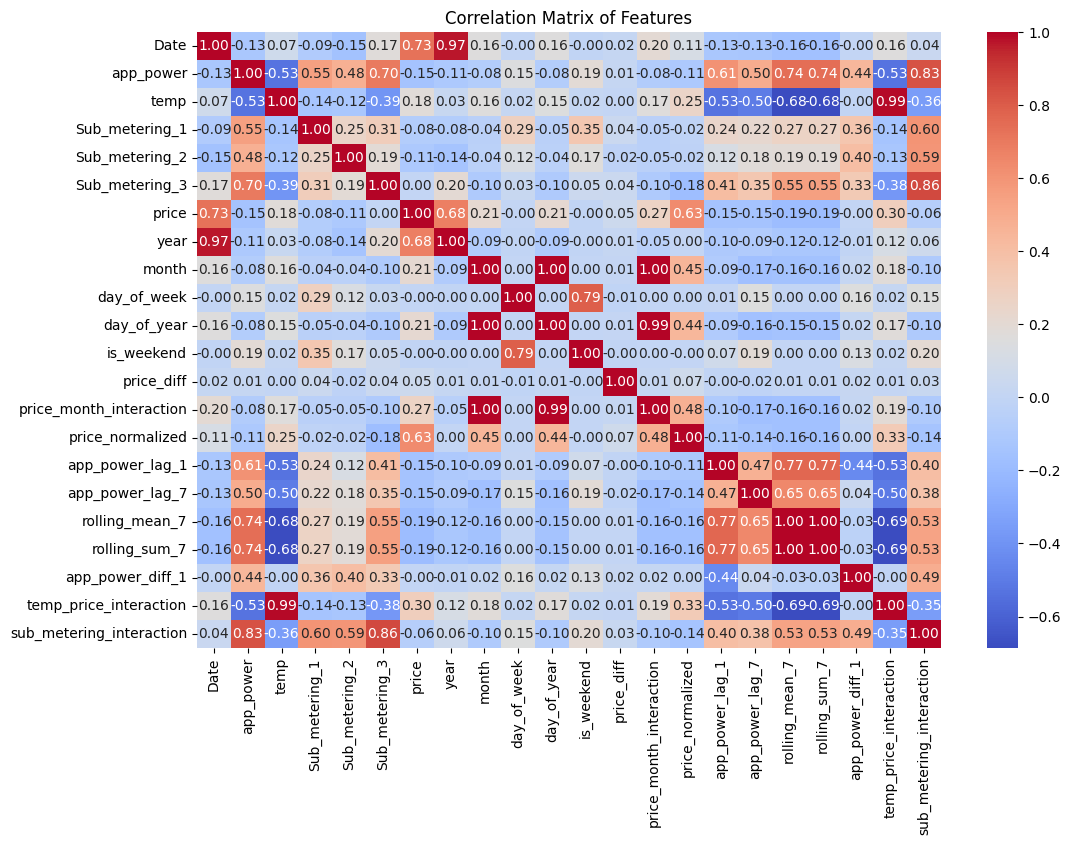

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [16]:
df.to_feather('dataset_current_Eng.feather')


#### Now we try some complex model types


In [3]:
df = pd.read_feather('dataset_current_Eng.feather')

In [4]:
# Define the split ratio (e.g., 80% for training, 20% for testing)
train_size = int(len(df) * 0.8)

# Split into training and testing sets
X_train, X_test = df.iloc[:train_size].drop(columns=['app_power', 'Date']), df.iloc[train_size:].drop(columns=['app_power', 'Date'])
y_train, y_test = df.iloc[:train_size]['app_power'], df.iloc[train_size:]['app_power']

In [5]:
# Drop rows with missing values in training and testing sets
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]  # Keep target values aligned

X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

In [6]:
X_train = X_train_clean
y_train = y_train_clean
X_test = X_test_clean
y_test = y_test_clean

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Decision Tree Regressor


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a decision tree regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_dt)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
mae = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree - R²: {r2}, RMSE: {rmse}, MAE: {mae}")

Decision Tree - R²: 0.5416972310036046, RMSE: 336.44091116884454, MAE: 211.18669466149325


/home/wayne/MSOE/csc5610/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


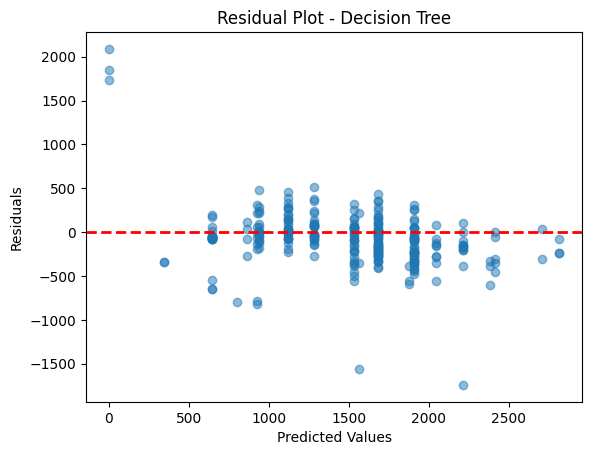

In [42]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_dt

# Residual plot
plt.scatter(y_pred_dt, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot - Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


#### Random Forest Regressor


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - R²: {r2}, RMSE: {rmse}, MAE: {mae}")

Random Forest - R²: 0.8383927384494667, RMSE: 199.7850540520293, MAE: 134.36030426980776


/home/wayne/MSOE/csc5610/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



#### Support Vector Regression (SVR)


In [44]:
from sklearn.svm import SVR

# Train an SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
mae = mean_absolute_error(y_test, y_pred_svr)

print(f"SVR - R²: {r2}, RMSE: {rmse}, MAE: {mae}")

SVR - R²: -0.05581388206991744, RMSE: 510.6534188065173, MAE: 382.21283264110303


/home/wayne/MSOE/csc5610/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



#### Feedforward Neural Network


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Predict on test data
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Evaluate the model
r2 = r2_score(y_test, y_pred_nn)
rmse = mean_squared_error(y_test, y_pred_nn, squared=False)
mae = mean_absolute_error(y_test, y_pred_nn)

print(f"Neural Network - R²: {r2}, RMSE: {rmse}, MAE: {mae}")

Epoch 1/50


/home/wayne/MSOE/csc5610/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2873340.5000 - val_loss: 1382087.2500
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1203714.6250 - val_loss: 493547.5625
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241229.5781 - val_loss: 551733.6250
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123585.9688 - val_loss: 571635.8125
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71722.6172 - val_loss: 593688.0625
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60243.4805 - val_loss: 657613.5000
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44892.0703 - val_loss: 686371.0625
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31863.7812 - val_loss: 738924.8750
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30020.8965 - val_loss: 861271.3750
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22227.3418 - val_loss: 928680.2500
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20677.1719 - v

/home/wayne/MSOE/csc5610/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


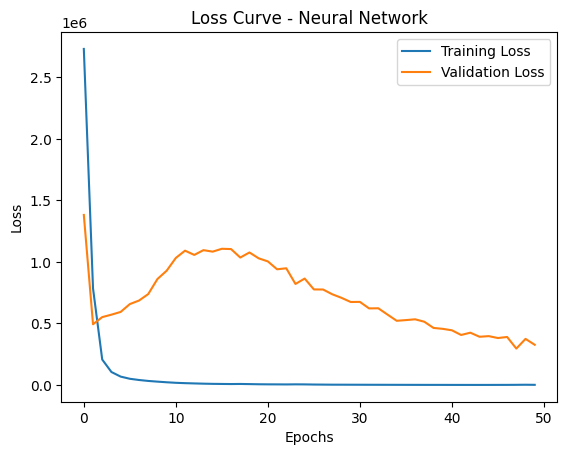

In [47]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Gradient Boosting Regressor


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
mae = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting - R²: {r2}, RMSE: {rmse}, MAE: {mae}")

Gradient Boosting - R²: 0.8968787106649178, RMSE: 159.59038671171407, MAE: 98.29403889182375


/home/wayne/MSOE/csc5610/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



##### Residual Plot


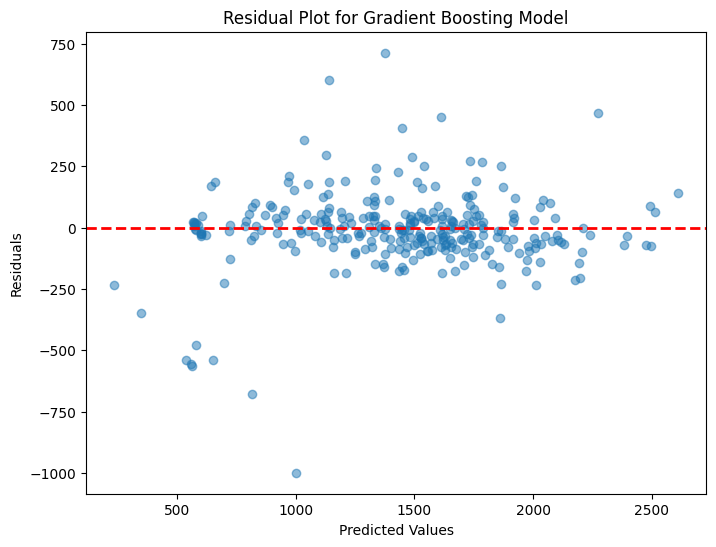

In [8]:
# Calculate residuals
residuals = y_test - y_pred_gb

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)  # Horizontal line at residual = 0
plt.title('Residual Plot for Gradient Boosting Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Save the plot as a file
plt.savefig('residual_plot_gradient_boosting.png', dpi=300)

# Show the plot
plt.show()